In [30]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.patches
import matplotlib.path

In [60]:
def value_from_file(fileway):
    with open(fileway, 'r') as f:
        n = []
        for line in f:
            line = f.readline()
            n.append(line.split('\t')[0])
    return  list(map(float, n))

def stat_left(fileway):
    count = 0
    for i in value_from_file(fileway):
        if i < -1.53 and i > -1.59: count += 1
    return count        

def total_shots(fileway, i):
    with open(fileway, 'r') as f:
        n = []
        for line in f:
            line = f.readline()
            n.append(line.split('\t')[i])
    l1 = list(map(float, n))
    return (sum(l1)/len(l1))

def histogram(fileway,name1,fileway1,name2,b1,b2): # b1,b2 - bins of hist
    fig, (p1, p2) = plt.subplots(1, 2, figsize=(16,3))
    p1.hist(value_from_file(fileway), bins = b1,color = 'blue');
    p1.set_xlim(-1.6,-1.45)
    p2.set_xlim(-1.6,-1.45)
    p1.set_ylabel('количество повторений')
    p1.set_xlabel('значение минимального состояния')
    p1.set_title(name1);
    p1.axes.grid(linestyle='--')
    p2.hist(value_from_file(fileway1),bins=b2, color = 'blue');
    p2.set_ylabel('количество повторений')
    p2.set_xlabel('значение минимального состояния')
    p2.set_title(name2);
    p2.axes.grid(linestyle='--')
    '''
    props = dict(boxstyle='round', facecolor='b', alpha=0.3)
    textstr1 = 'вероятность:  '+ str(round(100*stat_left(fileway)/2365,1)) 
    textstr2 = 'вероятность:  '+ str(round(100 - 100*stat_left(fileway)/2365,1))
    p2.text(0.15, 0.95, textstr1, transform=p1.transAxes, fontsize=8,
        verticalalignment='top', bbox=props)
    p2.text(0.75, 0.95, textstr2, transform=p1.transAxes, fontsize=8,
        verticalalignment='top', bbox=props)
    '''

    #fig.savefig("foo.pdf", bbox_inches='tight')


    
def hist_union(fileway,b,name,title):
    fig, ax = plt.subplots(figsize=(21,8))
    for i in range(len(fileway)):
        ax.hist(value_from_file(fileway[i]),bins = b[i], label = name[i] + ' вероятность схождения: '+ str(round(100*stat_left(fileway[i])/2365,1))+ '% / '+ str(round(100 -100*stat_left(fileway[i])/2365,1)) + '%',range = (-1.6,-1.45), alpha = 0.5);
    ax.grid(True, linestyle = '--')
    ax.set_xlim(-1.6,-1.45)
    ax.legend(loc='upper left', fontsize = 18)
    ax.set_title(title,fontsize = 18)
    fig.savefig('graph/'+title+'.pdf', bbox_inches='tight')
    ax.tick_params(axis='both', which='major', labelsize=16)

    

## Полные статистики (с ограничением на количество итераций минимизатора)

AttributeError: 'Figure' object has no attribute 'tick_params'

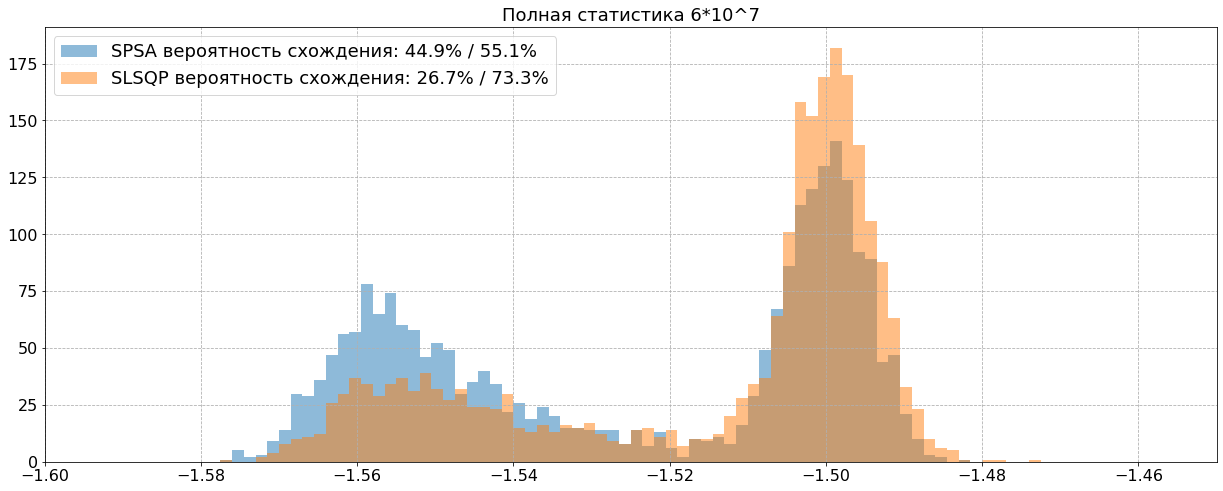

In [59]:
hist_union(fileway= ['Data/vqe_hadamard_spsa_10^4_maxiter_10^3.txt','Data/vqe_hadamard_slsqp_10^4_maxiter_100.txt'],name = ['SPSA','SLSQP'], b = [100,100], title = 'Полная статистика 6*10^7')


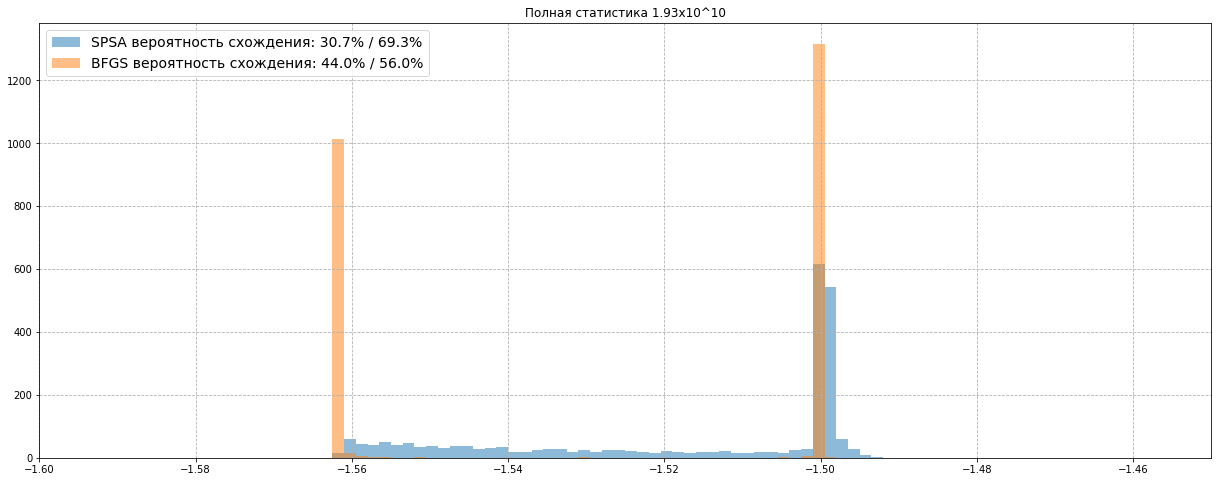

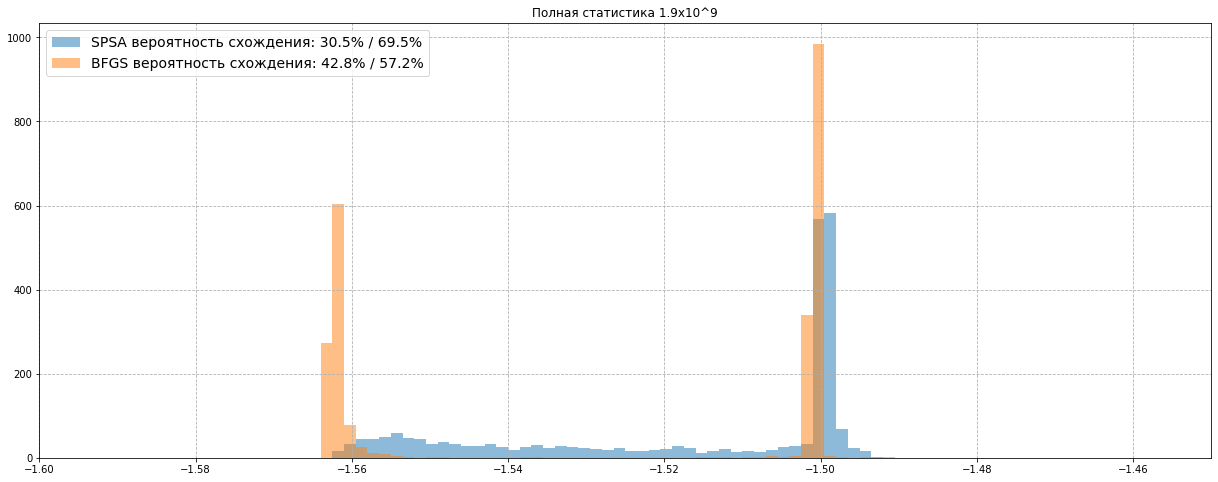

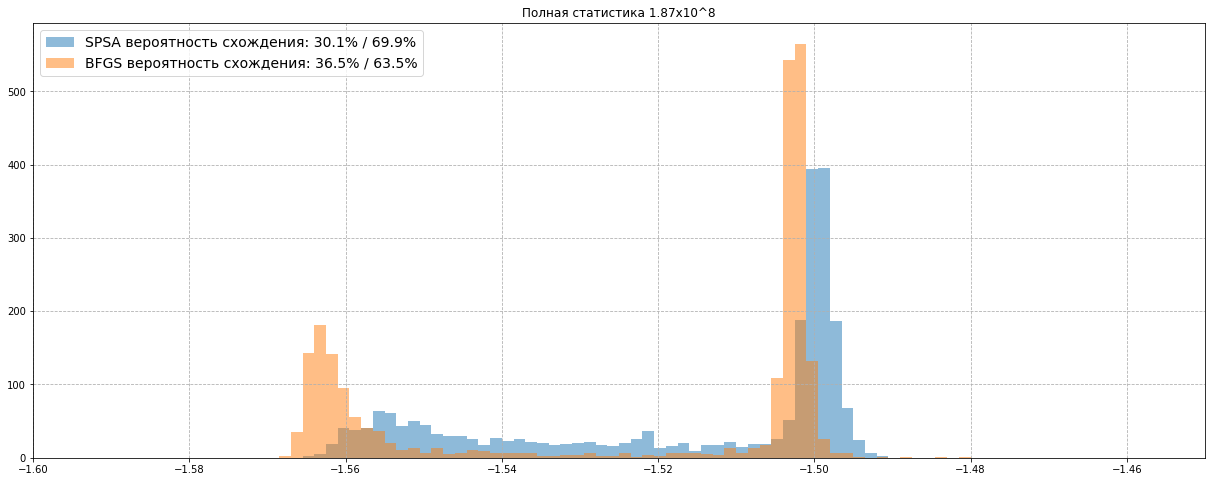

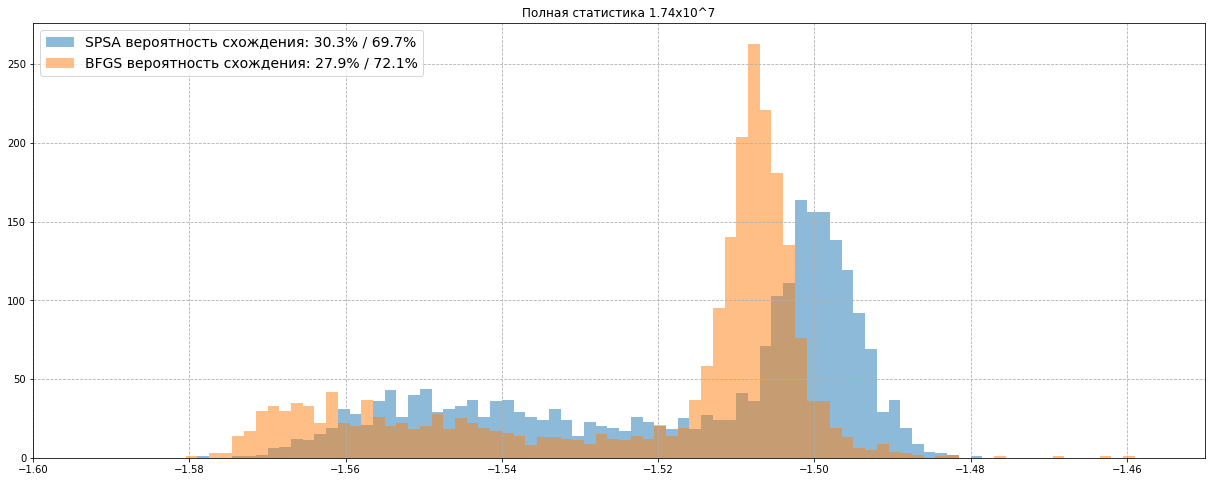

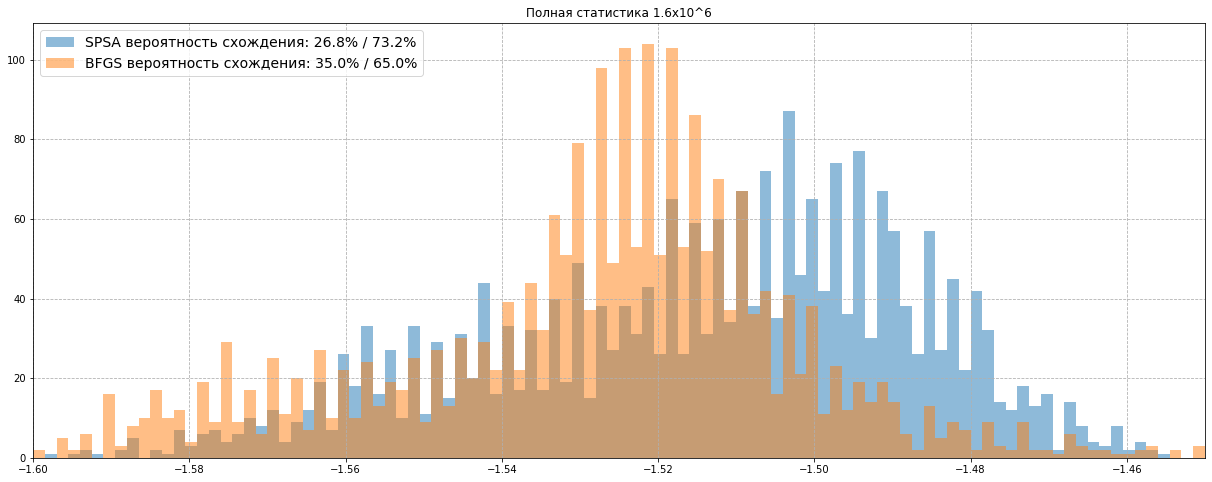

In [43]:
hist_union(fileway= ['Data/vqe_hadamard_spsa_10^7_maxiter_321.txt','Data/vqe_hadamard_bfgs_10^7.txt'],name = ['SPSA','BFGS'], b = [100,100], title = 'Полная статистика 1.93x10^10')
hist_union(fileway= ['Data/vqe_hadamard_spsa_10^6_maxiter_316.txt','Data/vqe_hadamard_bfgs_10^6.txt'],name = ['SPSA','BFGS'], b = [100,100], title = 'Полная статистика 1.9x10^9')
hist_union(fileway= ['Data/vqe_hadamard_spsa_10^5_maxiter_310.txt','Data/vqe_hadamard_bfgs_10^5.txt'],name = ['SPSA','BFGS'], b = [100,100], title = 'Полная статистика 1.87x10^8')
hist_union(fileway= ['Data/vqe_hadamard_spsa_10^4_maxiter_290.txt','Data/vqe_hadamard_bfgs_10^4.txt'],name = ['SPSA','BFGS'], b = [100,100], title = 'Полная статистика 1.74x10^7')
hist_union(fileway= ['Data/vqe_hadamard_spsa_10^3_maxiter_266.txt','Data/vqe_hadamard_bfgs_10^3.txt'],name = ['SPSA','BFGS'], b = [100,100], title = 'Полная статистика 1.6x10^6')

# Сomparison (no restrictions)

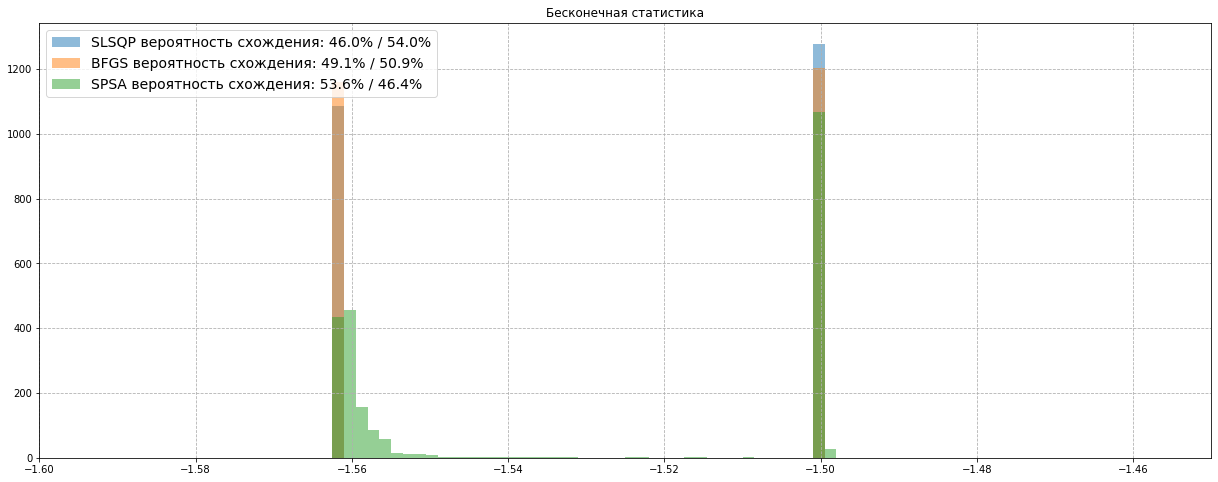

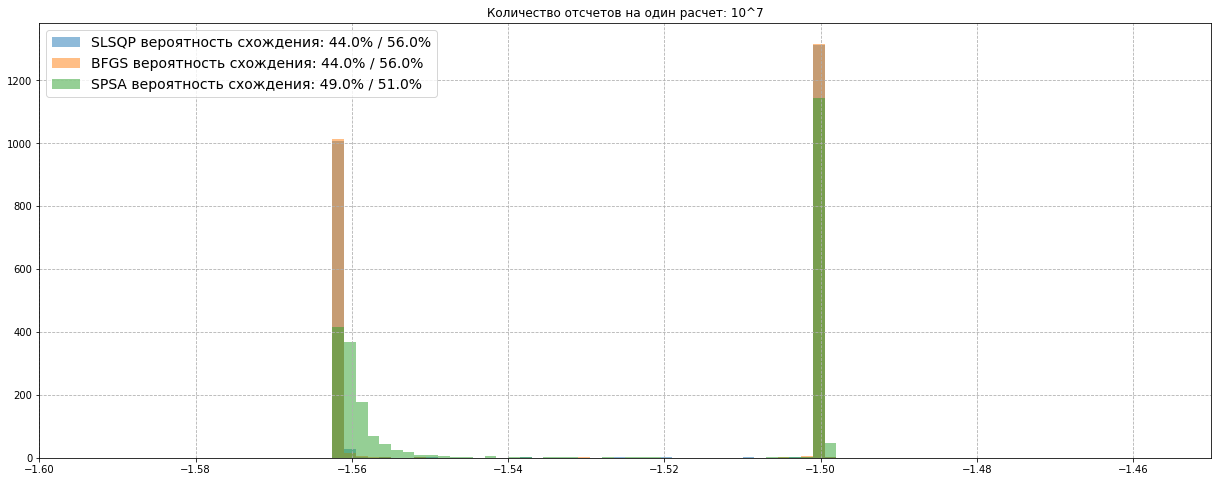

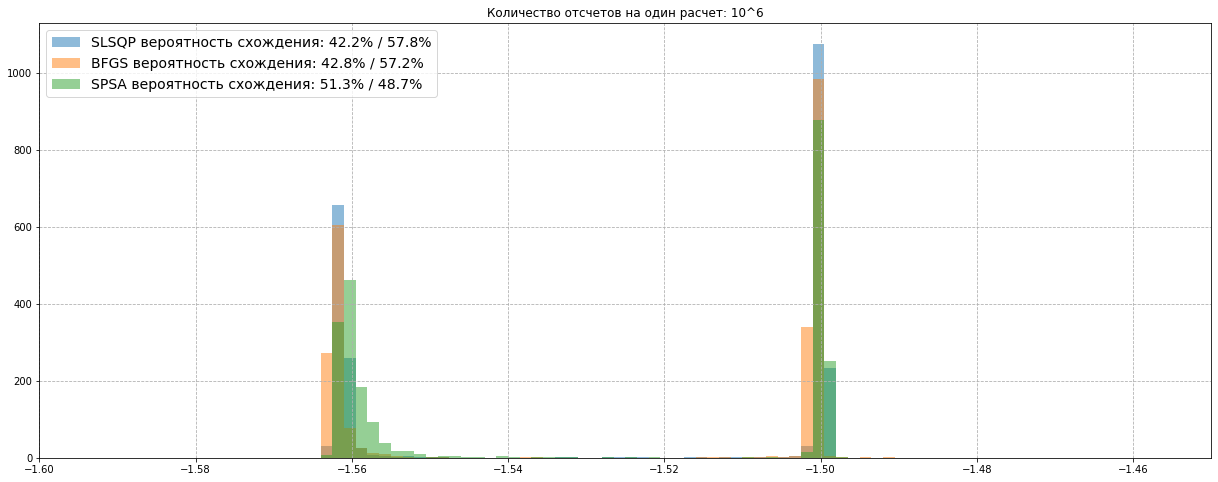

In [40]:
hist_union(fileway= ['Data/vqe_hadamard_slsqp_inf.txt','Data/vqe_hadamard_bfgs_inf.txt','Data/vqe_hadamard_spsa_inf.txt'],name = ['SLSQP','BFGS','SPSA'], b = [100,100,100], title = 'Бесконечная статистика')
hist_union(fileway= ['Data/vqe_hadamard_slsqp_10^7.txt','Data/vqe_hadamard_bfgs_10^7.txt','Data/vqe_hadamard_spsa_10^7.txt'],name = ['SLSQP','BFGS','SPSA'], b = [100,100,100], title = 'Количество отсчетов на один расчет: 10^7')
hist_union(fileway= ['Data/vqe_hadamard_slsqp_10^6.txt','Data/vqe_hadamard_bfgs_10^6.txt','Data/vqe_hadamard_spsa_10^6.txt'],name = ['SLSQP','BFGS','SPSA'], b = [100,100,100], title = 'Количество отсчетов на один расчет: 10^6')

# SLSQP

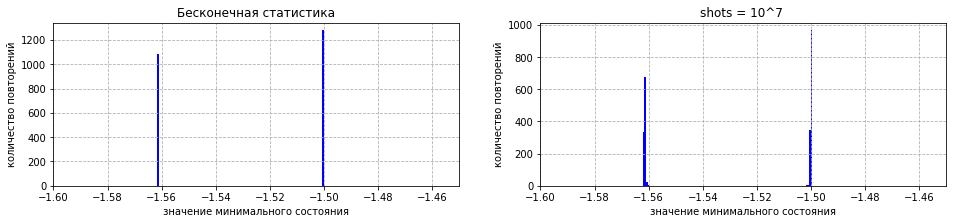

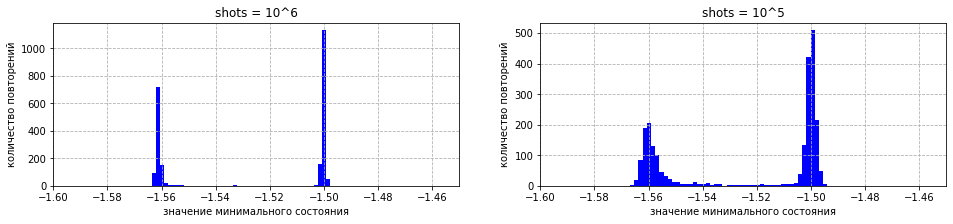

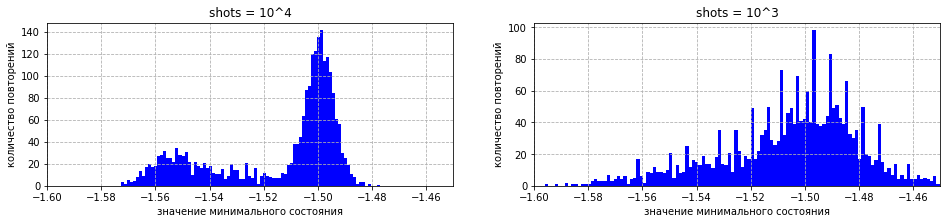

In [144]:
histogram(fileway = 'Data/vqe_hadamard_slsqp_inf.txt',fileway1='Data/vqe_hadamard_slsqp_10^7.txt', name1 = 'Бесконечная статистика',name2 = 'shots = 10^7 ',b1 = 100,b2= 100)
histogram(fileway = 'Data/vqe_hadamard_slsqp_10^6.txt',fileway1 = 'Data/vqe_hadamard_slsqp_10^5.txt',name1 = 'shots = 10^6',name2 = 'shots = 10^5',b1 = 250,b2 = 1150)
histogram(fileway = 'Data/vqe_hadamard_slsqp_10^4.txt',fileway1 = 'Data/vqe_hadamard_slsqp_10^3.txt',name1 = 'shots = 10^4',name2 = 'shots = 10^3',b1 = 1550,b2 = 1250)

# BFGS


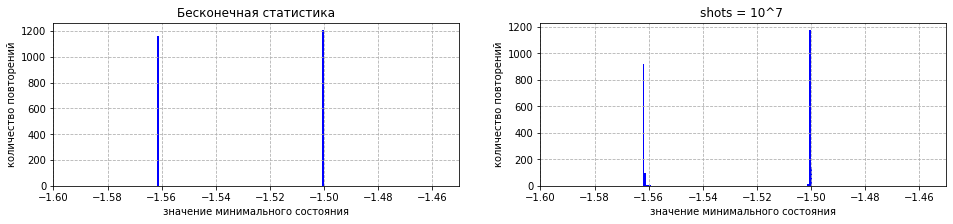

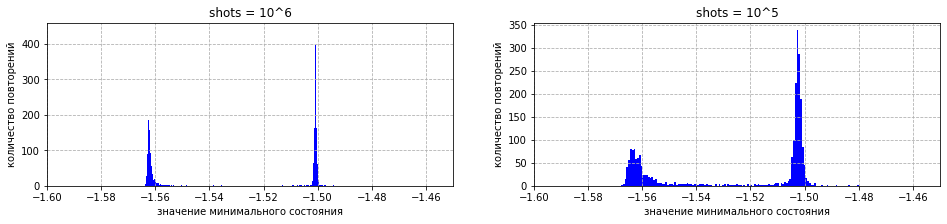

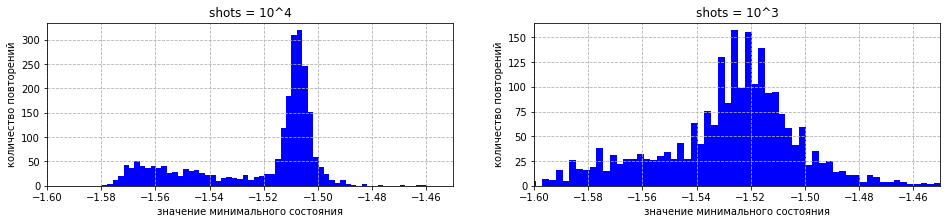

In [5]:
histogram(fileway = 'Data/vqe_hadamard_bfgs_inf.txt',fileway1='Data/vqe_hadamard_bfgs_10^7.txt', name1 = 'Бесконечная статистика',name2 = 'shots = 10^7 ',b1 = 100,b2= 100)
histogram(fileway = 'Data/vqe_hadamard_bfgs_10^6.txt',fileway1 = 'Data/vqe_hadamard_bfgs_10^5.txt',name1 = 'shots = 10^6',name2 = 'shots = 10^5',b1 = 250,b2 = 1150)
histogram(fileway = 'Data/vqe_hadamard_bfgs_10^4.txt',fileway1 = 'Data/vqe_hadamard_bfgs_10^3.txt',name1 = 'shots = 10^4',name2 = 'shots = 10^3',b1 = 1550,b2 = 1250)

# SPSA


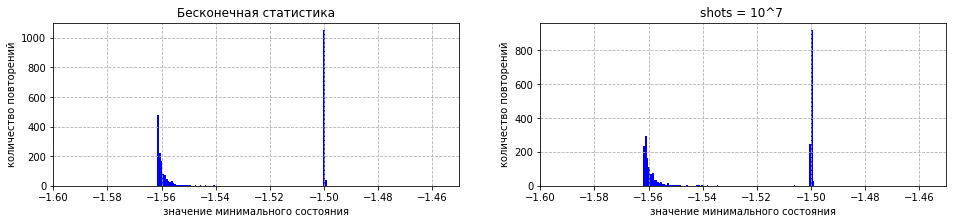

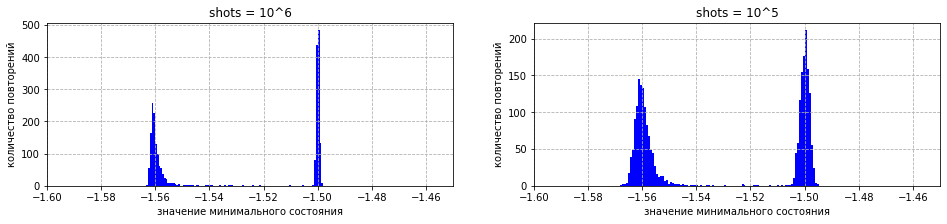

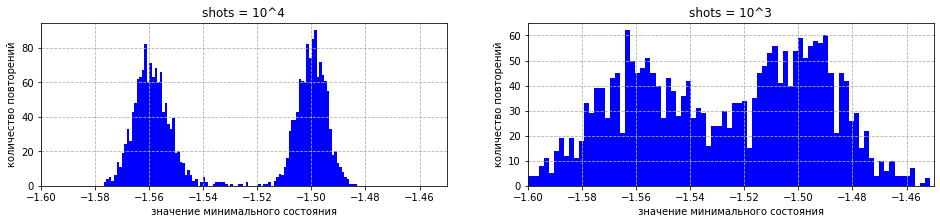

In [18]:
histogram(fileway = 'Data/vqe_hadamard_spsa_inf.txt',fileway1='Data/vqe_hadamard_spsa_10^7.txt', name1 = 'Бесконечная статистика',name2 = 'shots = 10^7 ',b1 = 100,b2= 100)
histogram(fileway = 'Data/vqe_hadamard_spsa_10^6.txt',fileway1 = 'Data/vqe_hadamard_spsa_10^5.txt',name1 = 'shots = 10^6',name2 = 'shots = 10^5',b1 = 100,b2 = 100)
histogram(fileway = 'Data/vqe_hadamard_spsa_10^4.txt',fileway1 = 'Data/vqe_hadamard_spsa_10^3.txt',name1 = 'shots = 10^4',name2 = 'shots = 10^3',b1 = 100,b2 = 100)